## HOWEWORK 3

### Problem Statement
A business provides you with the following data and wants you to find patterns in their
customer's habits so that they can make better recommendations and target certain
groups in the future

#### Question: Would we approach this as a supervised or unsupervised learning task and why?

<span style = 'color:green'>
We will approach this as an unsupervised learning task because we are looking to find patterns and groupings in the customer's habits without predefined labels or outcomes. This will allow us to discover natural segments within the data that can be used to make better recommendations and target specific groups in the future.

### About The Data
The data we'll be using for this homework contains the following customer attributes:

* ID
* Gender
* Spending Score
* Age
* Income

In [1]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

# Step 1
Begin by importing the data and displaying the first 5 observations. 

In [2]:
import pandas as pd
business_df = pd.read_csv("data_h3_3337.csv")
business_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Answer the following using Pandas:<br>

### How many observations are there in total?


In [3]:
business_df.shape

(200, 5)

<span style = "color:green">

**there are 200 observations and 5 features in this dataset.**

#### Are there any missing values?


In [4]:
missing_values = business_df.isnull().sum()
print(missing_values)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<span style = 'color:green'>
    
**seems like there are no missing values in the given dataset.**

#### How many unique values are in each column?

In [5]:
check_unique = business_df.nunique()

# Number of unique values per column
unique_values = business_df.nunique()
print("Number of unique values per column:\n", unique_values)

Number of unique values per column:
 CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


# Step 2 (visualizations)

Create the following plots: A histogram of Age, Annual Income (k$), and Spending Score
(1-100). 

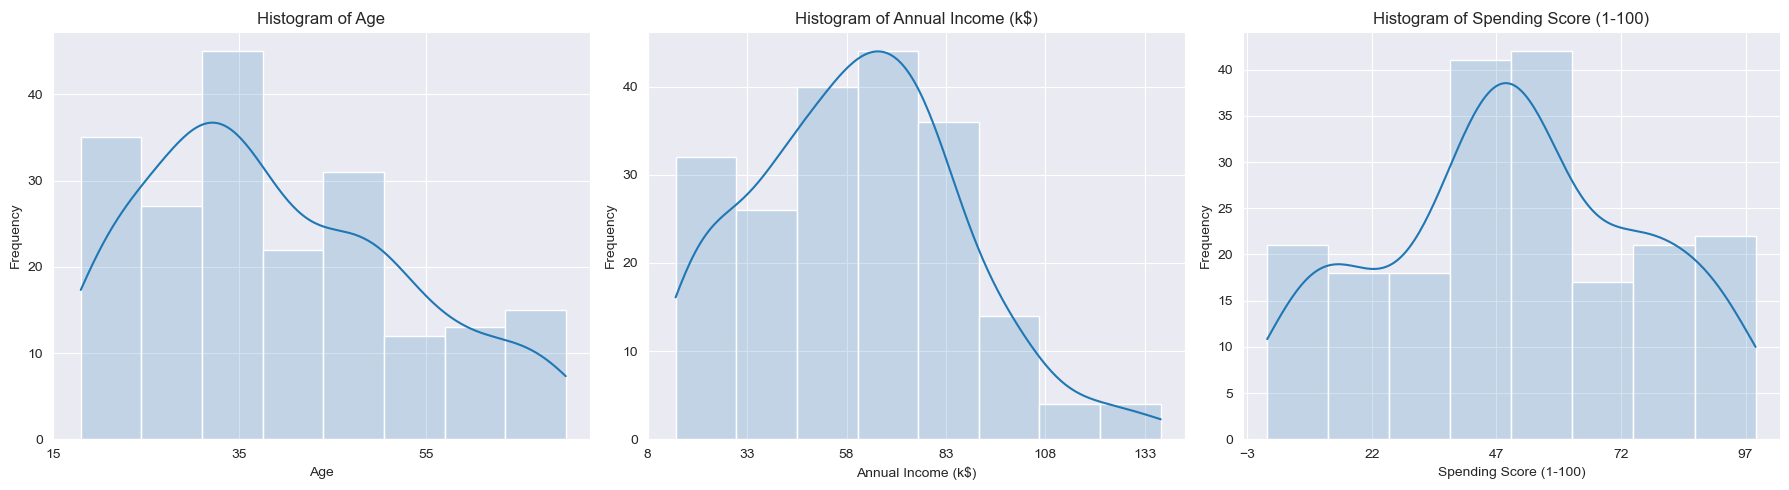

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
business_df = pd.read_csv("data_h3_3337.csv")

# Plotting histograms with KDE using histplot
plt.figure(figsize=(18, 5))

# to set custome ticks
# Function to set custom x-axis intervals
def set_custom_xticks(ax, interval):
    min_val, max_val = ax.get_xlim()
    ax.set_xticks(range(int(min_val), int(max_val)+1, interval))

    
# Histogram for Age with KDE
plt.subplot(1, 3, 1)
sns.histplot(business_df['Age'], bins=8, kde=True, alpha = 0.2)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
set_custom_xticks(plt.gca(), 20)  # Set interval for Age

# Histogram for Annual Income (k$) with KDE
plt.subplot(1, 3, 2)
sns.histplot(business_df['Annual Income (k$)'], bins=8, kde=True, alpha = 0.2)
plt.title('Histogram of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
set_custom_xticks(plt.gca(), 25)  # Set interval for Annual Income (k$)

# Histogram for Spending Score (1-100) with KDE
plt.subplot(1, 3, 3)
sns.histplot(business_df['Spending Score (1-100)'], bins=8, kde=True, alpha = 0.2)
plt.title('Histogram of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
set_custom_xticks(plt.gca(), 25)  # Set interval for Spending Score (1-100)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Question: What can you conclude from the plots you created? Are there any interesting findings?

<span style = 'color:green'> 
The distribution of age appears to be more promident for customers that are younger than 56 years old which explains the slight right skedness of the plot itself.
<br> 
    
As for the plot for annual income seem to display a slight right skew but has some prominent frequency far out the left from the mean which happens to approximetly be ~60k by looking at the graph. 
<br>     
As for the histogram of spending score seems to be nearly symmetric indicating that the data distribution seem to be balanced and uniformed. 

### Visualizations Continued… (Pie Chart)

Create a pie chart showing the proportions of male to female in our data.

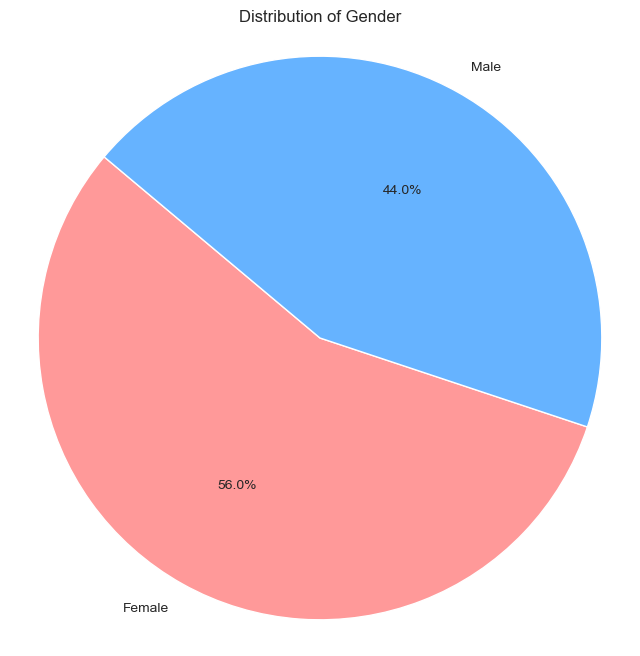

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
business_df = pd.read_csv("data_h3_3337.csv")

# Count the occurrences of each gender
gender_counts = business_df['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

#### What can you conclude from the plot you created? 

## Visualizations Continued… (Heatmap)

<Axes: >

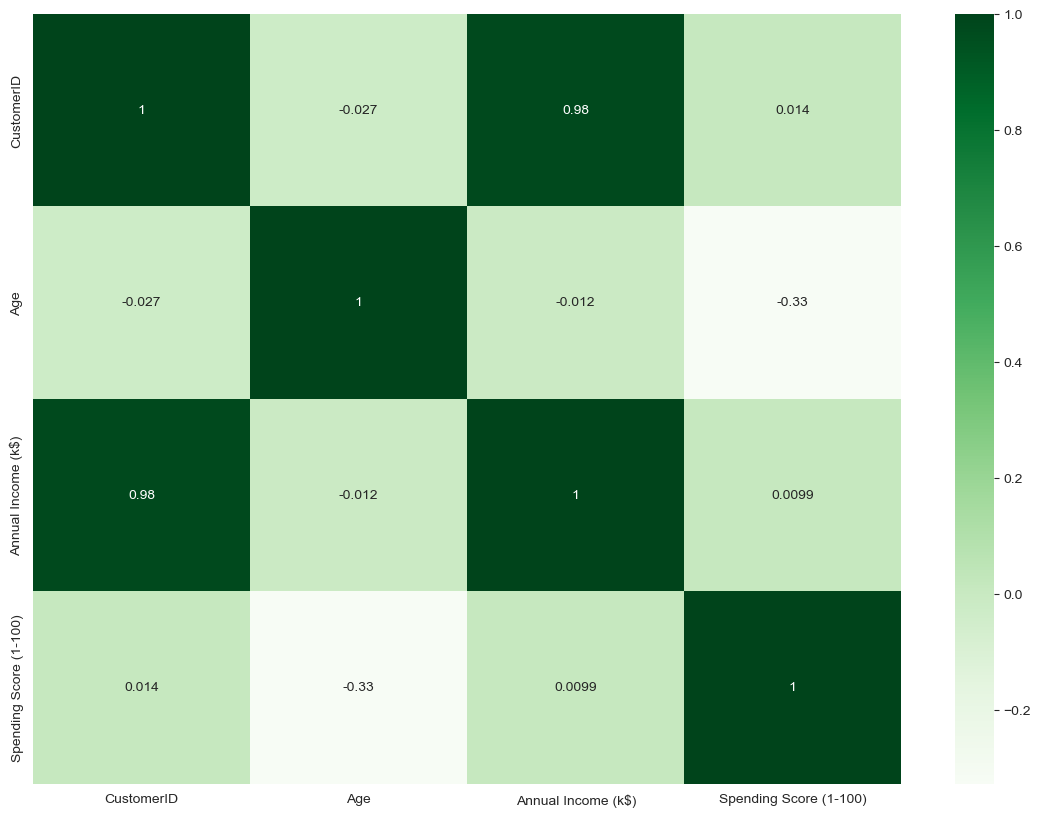

In [8]:
import seaborn as sb

# lets remove the 'gender' column but first lets make a copy incase we might need this column
business_df_copy = business_df.copy()
business_df_copy = business_df_copy.drop('Gender', axis = 1)

cor_matrix = business_df_copy.corr()

plt.figure(figsize=(14,10)) # adjust the display size!
sb.heatmap(cor_matrix, annot = True, cmap = 'Greens')

### Question: After creating your heatmap, is there anything interesting? For example, any significant multicollinearity?

<span style = 'color : green'> 
   
**There is some depiction of multicollinearity between Annual Income and CustomerID. The lowest correlation there is, is between features age and spending score with a correlation value of -0.33.** 

## Visualizations Continued (Scatterplots)

Create the following plots: A scatter plot of Age vs. Annual Income(k$), Age vs. Spending Score (1-100), and Annual Income (k$) vs. Spending Score (1-100). 

In [9]:
# creating scatterplots 

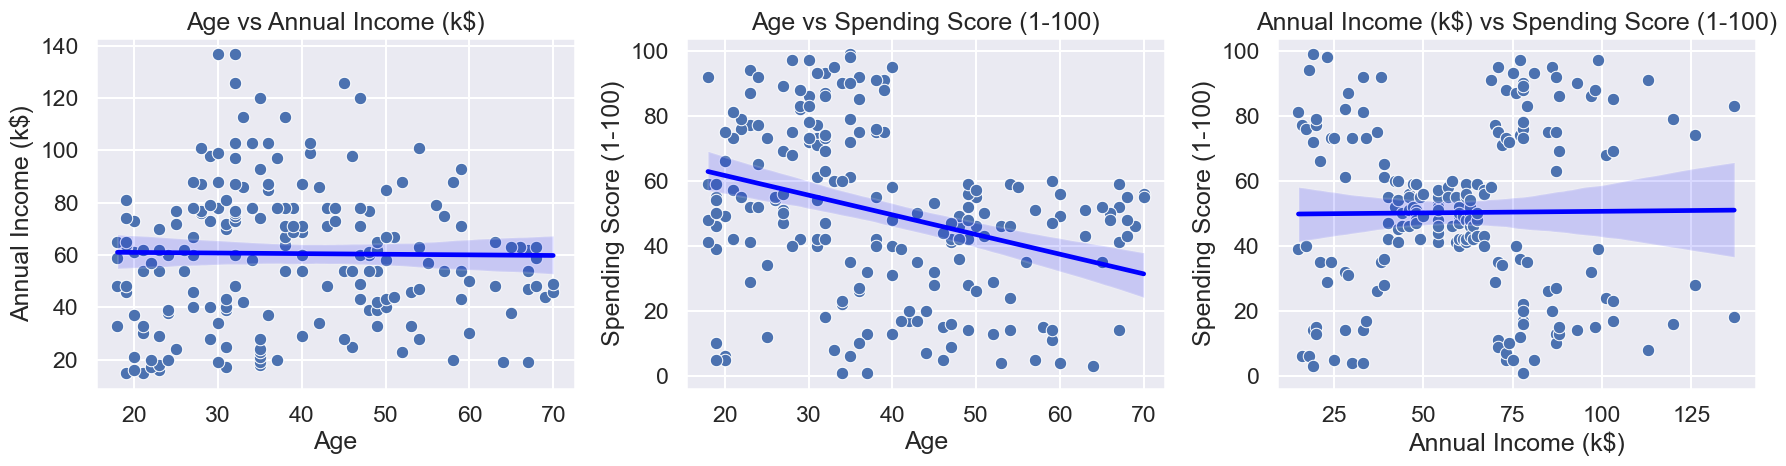

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming business_df is your DataFrame

# Set the style and context for the plots
sns.set(style="darkgrid", context="talk")

# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of Age vs Annual Income with regression line
sns.scatterplot(ax=axes[0], x='Age', y='Annual Income (k$)', data=business_df)
sns.regplot(ax=axes[0], x='Age', y='Annual Income (k$)', data=business_df, scatter=False, color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income (k$)')
axes[0].set_title('Age vs Annual Income (k$)')

# Scatter plot of Age vs Spending Score with regression line
sns.scatterplot(ax=axes[1], x='Age', y='Spending Score (1-100)', data=business_df)
sns.regplot(ax=axes[1], x='Age', y='Spending Score (1-100)', data=business_df, scatter=False, color='blue')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Age vs Spending Score (1-100)')

# Scatter plot of Annual Income vs Spending Score with regression line
sns.scatterplot(ax=axes[2], x='Annual Income (k$)', y='Spending Score (1-100)', data=business_df)
sns.regplot(ax=axes[2], x='Annual Income (k$)', y='Spending Score (1-100)', data=business_df, scatter=False, color='blue')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].set_title('Annual Income (k$) vs Spending Score (1-100)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


###  Question: What can you conclude from the plots you created? Are there any interesting findings?

<span style = 'color:green'>
    
**The data points for all three scatter plots seem to not have some linearity pattern and are rather spread out suggesting that the observed features are highly uncorrelated with each other.** 

## Visualizations Continued..
Create a line graph of Annual Income(k$) vs. Spending Score (1-100) for both genders. 

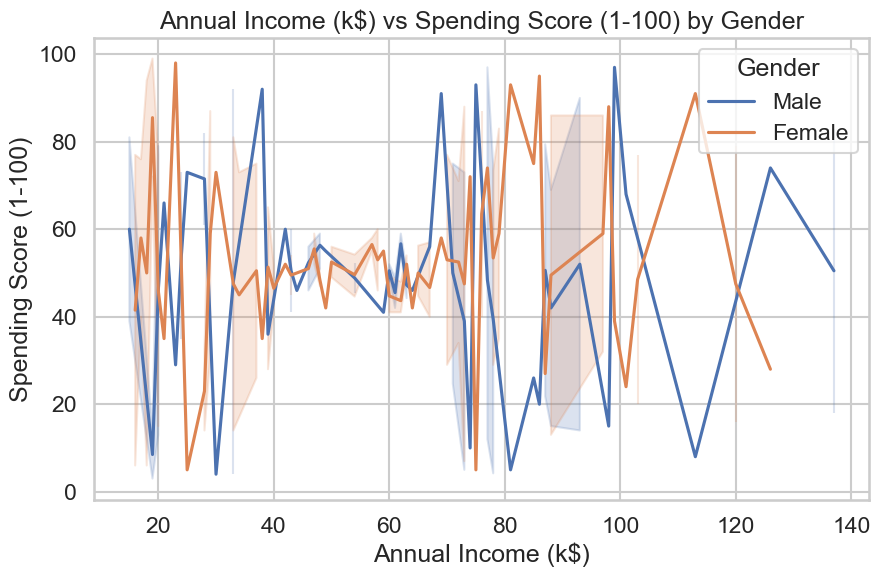

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming business_df is your DataFrame and it contains a 'Gender' column

# Set the style and context for the plots
sns.set(style="whitegrid", context="talk")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=business_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

# Set the labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100) by Gender')

# Show the plot
plt.show()


### Question: What can you say about the plot you created

<span style = 'color:green'> 

**Male and Female seem to follow the same trend from ~20k to 100k. After 100k male and female follow different trend. The male seem to spend less as they have higeher income than the women counterpart who also have higher income than 100k.**  

## Step 3 (K-Means Clustering)
For visualization purposes, only use spending score and income for the remaining portion
of this homework. For this step, perform the following:
* Use the elbow method to find the optimal number of clusters.
* Create a K-Means model using your optimal number of clusters
* Visualize the clusters by plotting them (annual income on one axis and spending score
on the other)

Note: refer back to labs if you're having trouble craeting the clusters for step 3 and 4

In [24]:
# X = business_df.iloc[:, [3, 4]].values
# print(X) making sure if im using the correct columns for the kmeans clustering application 

* step 3 (a) Use the elbow method to find the optimal number of clusters.

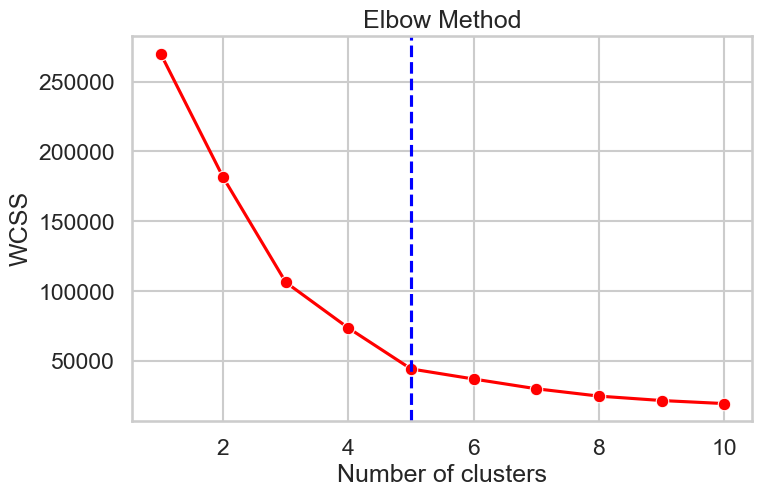

the optimal number of k clusters is: 5


In [11]:
# using the elbow method to view the optimal k number of clusters for this model 
# !pip install kneed
from sklearn.cluster import KMeans
from kneed import KneeLocator
import numpy as np


# Saving only Spending_Score and income values into X.
X = business_df.iloc[:, [3, 4]].values


##########

wcss = []

for i in range(1, 11): 
    # random_state just to ensure we get the same values in the end
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 42)
    kmeans.fit(X)
    
    # inertia method return wcss for the model
    wcss.append(kmeans.inertia_)
    
    
    
# Find the optimal k using the elbow method
kneedle = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing") # to locate the index for k optimal cluster
optimal_k = kneedle.elbow    
    
    
    
# creating lineplot to visualize wcss and find optimal number of clusters

sns.lineplot(x = range(1, 11), y = wcss, marker = 'o', color = 'red')
plt.axvline(x=optimal_k, color='blue', linestyle='--') # plotting the 
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


print(f'the optimal number of k clusters is: {optimal_k}')

* (2) Create a K-Means model using your optimal number of clusters

In [12]:
from sklearn.cluster import KMeans

# Create a K-Means model using your optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

* (3) Visualize the clusters by plotting them (annual income on one axis and spending score on the other)

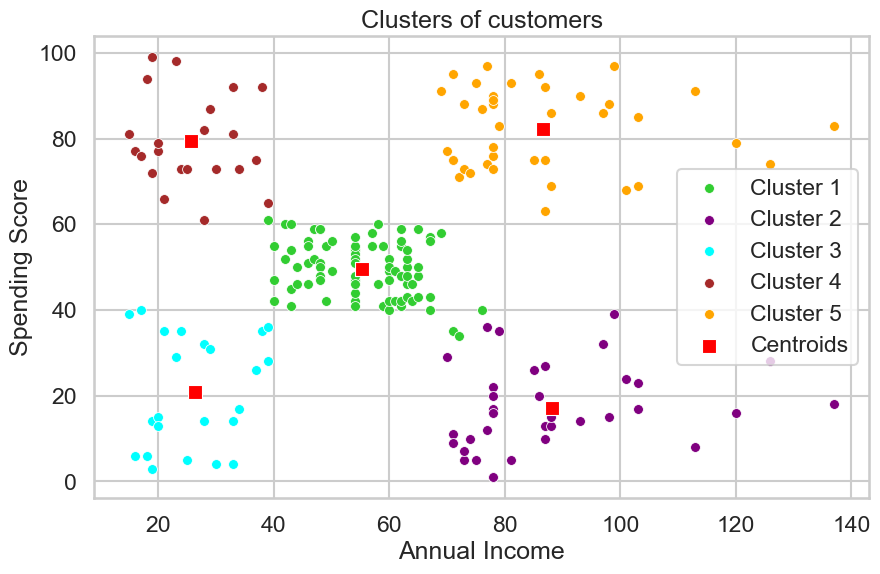

In [13]:
# Plotting the k-clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color='limegreen', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color='purple', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color='cyan', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color='brown', label='Cluster 4', s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color='orange', label='Cluster 5', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red',
                label='Centroids', s=100, marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Step 4 (Hierarchical Clustering)
Perform the following:
* Create a Dendrogram to find the optimal number of clusters. Use method = 'ward'.
    Hint: Look at the old lab on hierarchical clustering or scipy.cluster.hierarchy

* Visualizing the Clusters of hierarchical clustering

(1) Create a Dendrogram to find the optimal number of clusters.Using **method = 'ward'**

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


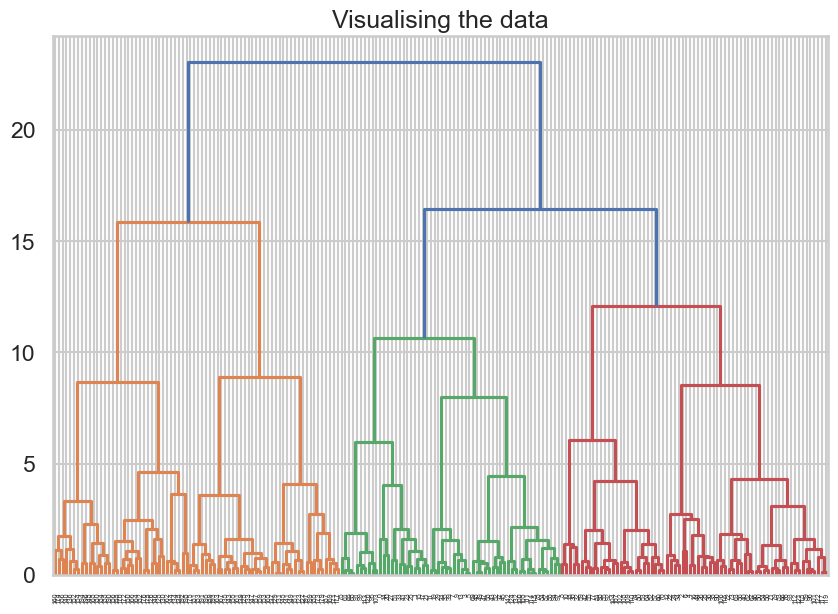

In [15]:
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

# Load the dataset
business_df = pd.read_csv("data_h3_3337.csv")

# Display the first few rows of the dataset
print(business_df.head())

# One-hot encode categorical columns
business_df_encoded = pd.get_dummies(business_df, drop_first=True)

# Standardize the features
scaler = StandardScaler()
business_df_scaled = scaler.fit_transform(business_df_encoded)

# Create a dendrogram
plt.figure(figsize=(10, 7))
plt.title('Visualising the data')
dendrogram = shc.dendrogram(shc.linkage(business_df_scaled, method='ward'))

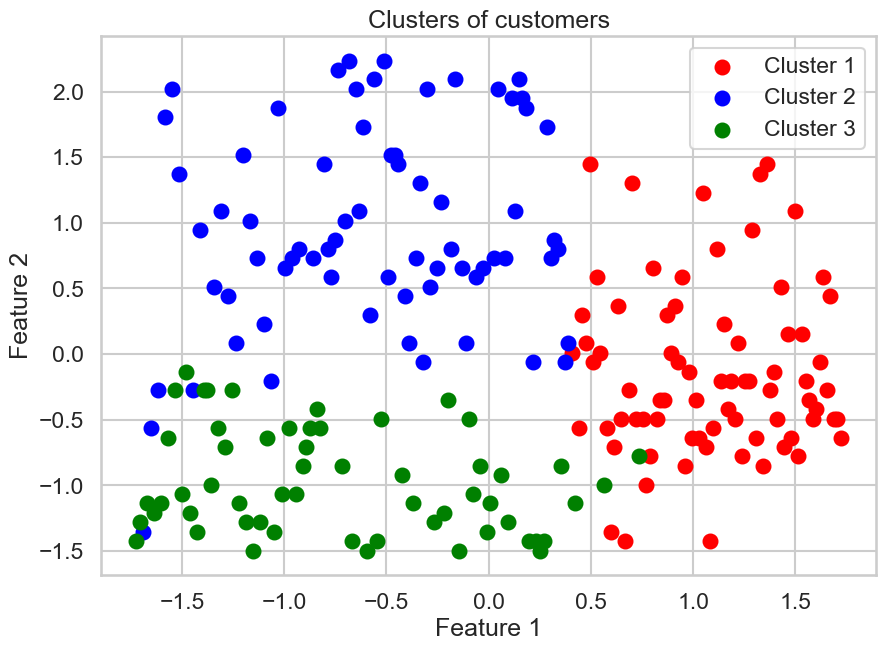

In [18]:

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# plt.xlabel('Customers')
# plt.ylabel('Euclidean distances')
# plt.show()

# Fit hierarchical clustering with the determined number of clusters (e.g., 3 clusters)
n_clusters = 3  # Replace with the number of clusters you determined
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(business_df_scaled)

# Visualize the clusters (assuming the first two features are used for 2D visualization)
plt.figure(figsize=(10, 7))
plt.scatter(business_df_scaled[y_hc == 0, 0], business_df_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(business_df_scaled[y_hc == 1, 0], business_df_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(business_df_scaled[y_hc == 2, 0], business_df_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
